## Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Importing DataSet

In [28]:
df = pd.read_csv('diabetes1.csv')

## Exploring DataSet

In [29]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Dealing with Missing Values

In [32]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [33]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [34]:
def median_target(var):   
    
    temp = df[df[var].notnull()]
    
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    
    return temp
columns = df.columns

columns = columns.drop("Outcome")

for col in columns:
    
    df.loc[(df['Outcome'] == 0 ) & (df[col].isnull()), col] = median_target(col)[col][0]
    df.loc[(df['Outcome'] == 1 ) & (df[col].isnull()), col] = median_target(col)[col][1]

In [35]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
X = df.drop(["Outcome"], axis = 1)
Y = df["Outcome"]

In [37]:
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


## Splitting the Dataset

In [38]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.3 , random_state = 2018)

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
%matplotlib inline

In [40]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Training the model using SVC , KNN , Decision Tree with Adaboost and MultiLayer Perceptron

In [41]:
svm_clf = SVC(kernel='rbf' , gamma = 0.001 , C = 1)
knn_clf = KNeighborsClassifier(n_neighbors = 3)
dt = DecisionTreeClassifier(max_depth = 3 , criterion = 'entropy' , random_state = 2018)
ada = AdaBoostClassifier(base_estimator = dt , n_estimators = 1000 , learning_rate = 0.1 , random_state = 2018)
mlp = MLPClassifier(activation = 'logistic' , solver = 'sgd' , learning_rate_init = 0.001 , learning_rate = 'constant' , alpha = 1e-4 , hidden_layer_sizes = (100,) , max_iter = 5000 , shuffle = True , random_state = 2018 )

In [42]:
svm_clf.fit(X_train_std , Y_train)
knn_clf.fit(X_train_std , Y_train)
ada.fit(X_train_std , Y_train)
mlp.fit(X_train_std , Y_train)

MLPClassifier(activation='logistic', max_iter=5000, random_state=2018,
              solver='sgd')

In [43]:
svm_pred = svm_clf.predict(X_test_std)
knn_pred = knn_clf.predict(X_test_std)
ada_pred = ada.predict(X_test_std)
mlp_pred = mlp.predict(X_test_std)

## Finding the accuracy score

In [44]:
print("Accuracy Score SVM" , accuracy_score(Y_test , svm_pred))
print("Accuracy Score KNN" , accuracy_score(Y_test , knn_pred))
print("Accuracy Score AdaBoost" , accuracy_score(Y_test , ada_pred))
print("Accuracy Score MLP" , accuracy_score(Y_test , mlp_pred))

Accuracy Score SVM 0.7359307359307359
Accuracy Score KNN 0.8051948051948052
Accuracy Score AdaBoost 0.8831168831168831
Accuracy Score MLP 0.8181818181818182


## Training the model using RandomForest

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=682)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [80]:
print("Accuracy Score RandomForest" , accuracy_score(Y_test , Y_pred_rf))
print(classification_report(Y_test , Y_pred_rf))
print(confusion_matrix(Y_test , Y_pred_rf))

Accuracy Score RandomForest 0.8874458874458875
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       162
           1       0.79      0.84      0.82        69

    accuracy                           0.89       231
   macro avg       0.86      0.87      0.87       231
weighted avg       0.89      0.89      0.89       231

[[147  15]
 [ 11  58]]


## Finding best Hyperparameters for RandomForest

In [47]:
max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

# rf = RandomForestClassifier(random_state=best_x)
# rf.fit(X_train,Y_train)
# Y_pred_rf = rf.predict(X_test)

90.91
834


In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=834)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [49]:
print("Accuracy Score RandomForest with best parameters " , accuracy_score(Y_test , Y_pred_rf))
print(classification_report(Y_test , Y_pred_rf))
print(confusion_matrix(Y_test , Y_pred_rf))

Accuracy Score RandomForest with best parameters  0.9090909090909091
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       162
           1       0.84      0.86      0.85        69

    accuracy                           0.91       231
   macro avg       0.89      0.89      0.89       231
weighted avg       0.91      0.91      0.91       231

[[151  11]
 [ 10  59]]


## Finding best Hyperparameters for KNN

In [50]:
knn_scores = []
for k in range(1,100):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, Y_train)
    knn_scores.append(knn_classifier.score(X_test, Y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

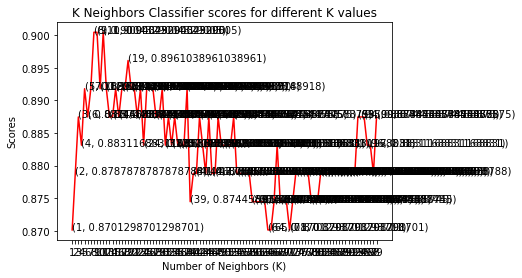

In [59]:
plt.plot(figsize=(20,20))
plt.plot([k for k in range(1, 100)], knn_scores, color = 'red')
for i in range(1,100):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 100)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [70]:
knn1_clf = KNeighborsClassifier(n_neighbors = 13)
knn1_clf.fit(X_train_std , Y_train)
knn1_pred = knn1_clf.predict(X_test_std)
print("Accuracy Score KNN with best parameters " , accuracy_score(Y_test , knn1_pred))
print(classification_report(Y_test , knn1_pred))
print(confusion_matrix(Y_test , knn1_pred))

Accuracy Score KNN with best parameters  0.8398268398268398
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       162
           1       0.72      0.77      0.74        69

    accuracy                           0.84       231
   macro avg       0.81      0.82      0.81       231
weighted avg       0.84      0.84      0.84       231

[[141  21]
 [ 16  53]]


## Finally RandomForest was selected with accuracy of 90.9%

In [71]:
import joblib
joblib.dump(rf,'ModelDiabetes.pkl')

['ModelDiabetes.pkl']

In [87]:
testDtaa = pd.DataFrame({'x':X.iloc[1]}).transpose()
modelReload=joblib.load('ModelDiabetes.pkl')
modelReload.predict(testDtaa)[0]

0

In [88]:
testDtaa

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
x,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0


In [90]:
type(X.iloc[1])

pandas.core.series.Series

In [93]:
df[df['Outcome'] == 1].tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37,1
757,0,123.0,72.0,32.0,169.5,36.3,0.258,52,1
759,6,190.0,92.0,32.0,169.5,35.5,0.278,66,1
761,9,170.0,74.0,31.0,169.5,44.0,0.403,43,1
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1
